# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [20]:
import torch
import torchvision
import numpy as np
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

np.random.seed(3221)
torch.manual_seed(3221)

train = torchvision.datasets.CIFAR10(root='/datasets', train=True, transform=ToTensor())
test = torchvision.datasets.CIFAR10(root='/datasets', train=False, transform=ToTensor())

train_loader = torch.utils.data.DataLoader(train,
                                           batch_size=5000,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test,
                                          batch_size=500,
                                          shuffle=True)

classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

## Split data into train and validation parts

Extract subset containing train and validation parts. 
Part must contain 5000 and 500 samples respectively.

In [21]:
# Train data 5000 samples
X_train, y_train = iter(train_loader).next()
print('Train len:', len(X_train), len(y_train))
# Validation data 500 samples
X_test, y_test = iter(test_loader).next()
print('Test len:', len(X_test), len(y_test))

Train len: 5000 5000
Test len: 500 500


## Dispaly some images  along with it class names

<Figure size 640x480 with 0 Axes>

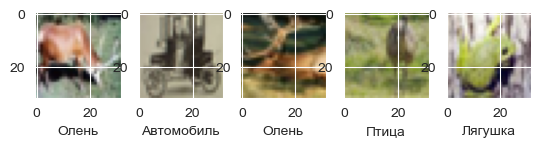

In [22]:
plt.figure()
f, ax = plt.subplots(1, 5)

for i in range(5):
    rand_num = np.random.randint(0, len(X_train))
    ax[i].imshow(X_train[rand_num].permute((1, 2, 0)))
    ax[i].set_xlabel(classes[y_train[rand_num]])
plt.show()

In [23]:
print('Pic size is', len(X_train[0]), len(X_train[0][0]), len(X_train[0][0][0]))

Pic size is 3 32 32


# Implement NearestNeighbor class

In [24]:
class NearestNeighbor:
    def __init__(self):
        self.train_set_objects = None
        self.train_set_answers = None

    def fit(self, x, y):
        """
          Arguments:
            x  (Tensor or numpy.array): collection of objects from testset (batch)
            y  (Tensor or numpy.array): collection of integer
            representing a class number for objects from x

        """

        self.train_set_objects = x
        self.train_set_answers = y

    def predict(self, x):
        """
          Arguments:
              x  (Tensor or numpy.array): collection of objects from testset (batch)

          Returns:
              class_num (Tensor or numpy.array) - collection of integer representing
              class numbers for objects from x
        """

        if self.train_set_objects is None:
            raise AttributeError("Model is not fitted")

        labels = []
        best_obj = -1
        best_err = np.inf

        for obj in x:
            for i in range(len(self.train_set_objects)):
                train_obj = self.train_set_objects[i]
                delta = torch.abs(obj - train_obj)
                err = torch.sum(delta)

                if err < best_err:
                    best_err = err
                    best_obj = i

            labels.append(self.train_set_answers[best_obj])

            best_obj = -1
            best_err = np.inf

        return np.array(labels)

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [25]:
model_nn = NearestNeighbor()
# Put your code here if you need

model_nn.fit(X_train, y_train)
predicted_labels = model_nn.predict(X_test[0:9])
for i, label in enumerate(predicted_labels):
    print(classes[label], "vs", classes[y_test[i]])

Самолет vs Самолет
Лошадь vs Кошка
Грузовик vs Птица
Собака vs Лошадь
Грузовик vs Кошка
Корабль vs Автомобиль
Птица vs Птица
Олень vs Кошка
Корабль vs Грузовик


In [27]:
%%time
# Check time

model_nn.fit(X_train, y_train)
y_pred = model_nn.predict(X_test)

CPU times: user 12.4 s, sys: 41 ms, total: 12.4 s
Wall time: 12.6 s


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [28]:
def validate(model, x, y):
    """
        Arguments:
            model (Object): instance of NearestNeighbor class
            x (Tensor or numpy.array): collection of objects
            y (Tensor or numpy.array): collection of integer representing
            class numbers for objects from x

        Returns:
            accuracy (float) : percentage of correctly classified objects
      """

    predicted_labels = np.array(model.predict(x))

    right = predicted_labels == np.array(y)
    accuracy = right.sum() / predicted_labels.size

    return accuracy

 ## Calculate model accuracy on validation data

In [29]:
accuracy = validate(model_nn, X_test, y_test)
print("Accuracy {:.3f}".format(accuracy))

Accuracy 0.310


# Place for brief conclusion
Feel free to describe troubles here.

As a person who came without knowledge of frames for DL, I can say that reading the data took 10 times longer than writing KNN :((



# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time

## KNN

In [30]:
from sklearn.base import BaseEstimator
import numpy as np


def AELoss(x, y):
    return torch.sum(torch.abs(x - y))


def SELoss(x, y):
    return torch.sum(torch.pow(x - y, 2))


class KNearestNeighborClassifier(BaseEstimator):  # use BaseEstimator only for CV from sklearn
    def __init__(self, k_neighbors, loss=AELoss):
        self.k_neighbors = k_neighbors
        self.train_set_objects = None
        self.train_set_answers = None
        self.loss = loss

    def fit(self, x, y):
        """
          Arguments:
            x  (Tensor or numpy.array): collection of objects from testset (batch)
            y  (Tensor or numpy.array): collection of integer
            representing a class number for objects from x

        """

        self.train_set_objects = x
        self.train_set_answers = y

    def predict(self, x):
        """
          Arguments:
              x  (Tensor or numpy.array): collection of objects from testset (batch)

          Returns:
              class_num (Tensor or numpy.array) - collection of integer representing
              class numbers for objects from x
        """

        if self.train_set_objects is None:
            raise AttributeError("Model is not fitted")

        labels = []

        for obj in x:
            neighbors = []
            for i in range(len(self.train_set_objects)):
                train_obj = self.train_set_objects[i]
                err = self.loss(train_obj, obj)
                neighbors.append((err, self.train_set_answers[i]))

            neighbors.sort()
            neighbors = np.array(neighbors[:self.k_neighbors], dtype=np.int64)
            best = np.argmax(np.bincount(neighbors[:, 1]))
            labels.append(best)

        return labels

In [31]:
# Smoke test for absolute error.
model_knn = KNearestNeighborClassifier(3)
model_knn.fit(X_train, y_train)

accuracy = validate(model_knn, X_test, y_test)
print("Accuracy {:.3f}".format(accuracy))

Accuracy 0.306


In [36]:
%%time
# Check time

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

CPU times: user 1min, sys: 359 ms, total: 1min
Wall time: 1min 1s


In [33]:
# Smoke test for square error.
model_knn = KNearestNeighborClassifier(3, loss=SELoss)
model_knn.fit(X_train, y_train)

accuracy = validate(model_knn, X_test, y_test)
print("Accuracy {:.3f}".format(accuracy))

Accuracy 0.276


## Cross validation

In [49]:
from sklearn.model_selection import cross_val_score

scores = {
    'k': [],
    'accuracy': []
}
k_values = list(range(1, 17))

for k in k_values:
    model_knn = KNearestNeighborClassifier(k)
    cv_score = cross_val_score(model_knn, X_train[:750], y_train[:750], cv=3, scoring='accuracy')
    print(cv_score)
    print(np.mean(cv_score))
    scores['k'].append(k)
    scores['accuracy'].append(np.mean(cv_score))

[0.232 0.244 0.204]
0.22666666666666666
[0.2   0.232 0.216]
0.216
[0.22  0.252 0.18 ]
0.2173333333333333
[0.236 0.252 0.232]
0.24
[0.236 0.256 0.244]
0.24533333333333332
[0.236 0.276 0.244]
0.252
[0.248 0.268 0.232]
0.24933333333333332
[0.22  0.252 0.232]
0.23466666666666666
[0.224 0.236 0.244]
0.23466666666666666
[0.24  0.244 0.224]
0.236
[0.248 0.244 0.252]
0.248
[0.236 0.248 0.244]
0.24266666666666667
[0.208 0.256 0.252]
0.23866666666666667
[0.204 0.264 0.252]
0.24
[0.216 0.272 0.236]
0.24133333333333332
[0.224 0.252 0.208]
0.22799999999999998


In [50]:
import pandas as pd

scores_df = pd.DataFrame(scores)
scores_df

,k,accuracy
0,1,0.226667
1,2,0.216000
2,3,0.217333
3,4,0.240000
4,5,0.245333
5,6,0.252000
6,7,0.249333
7,8,0.234667
8,9,0.234667
9,10,0.236000


In [51]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

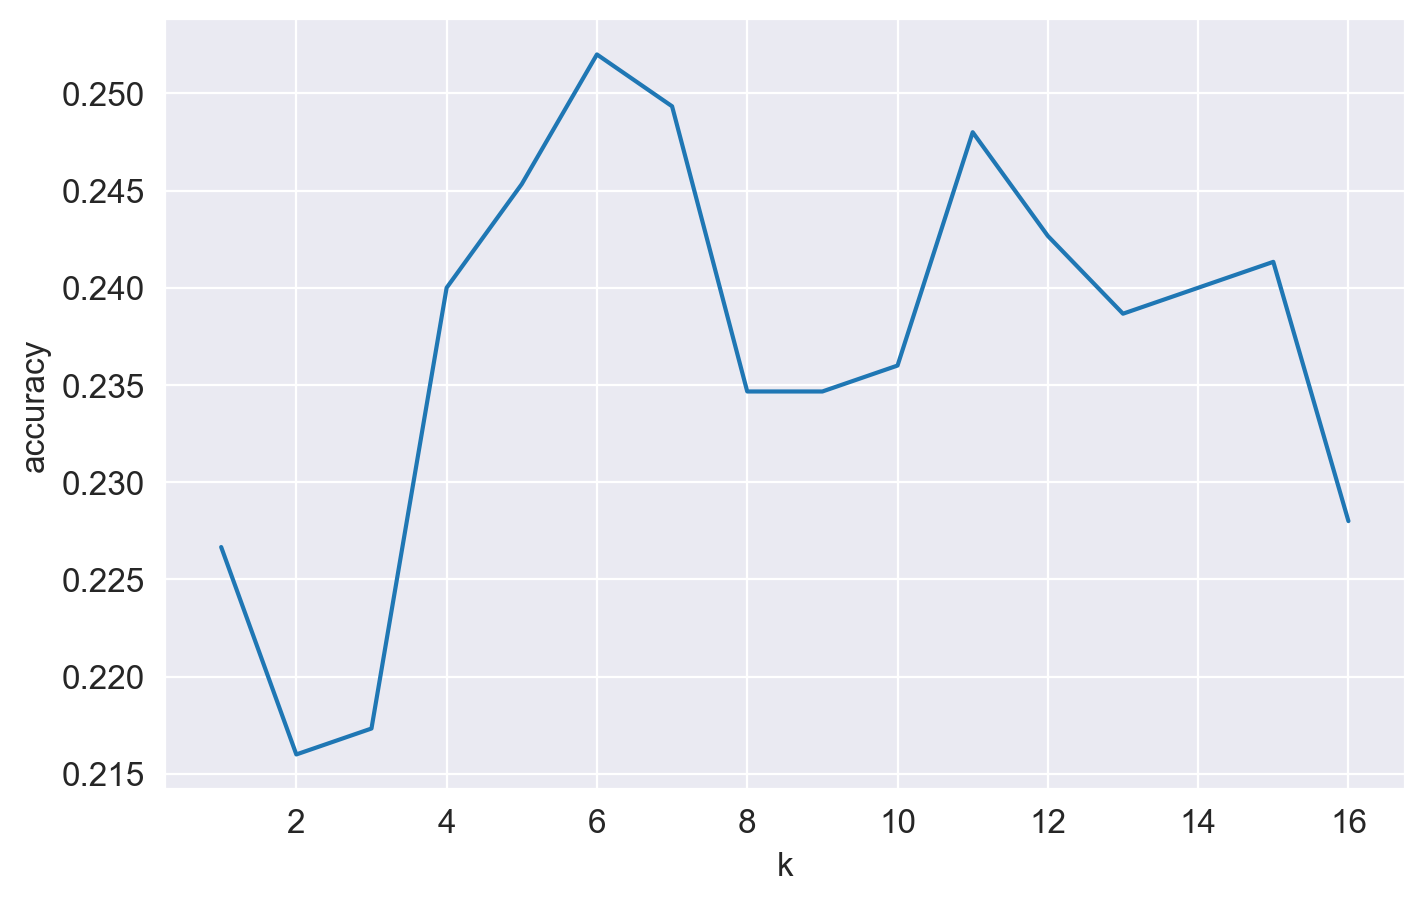

In [54]:
sns.lineplot(data=scores_df, x='k', y='accuracy')
plt.show()